In [1]:
import numpy as np
import pandas as pd


In [2]:
df= pd.read_csv('/content/tweet_and_emotion (2).csv')

In [3]:
df.head()

,tweet,emotions
0,@ZubairSabirPTI pls dont insult the word 'Molna',anger
1,@ArcticFantasy I would have almost took offens...,anger
2,@IllinoisLoyalty that Rutgers game was an abom...,anger
3,@CozanGaming that's what lisa asked before she...,anger
4,Sometimes I get mad over something so minuscul...,anger


In [4]:
df['emotions'].unique()

array(['anger', 'fear', 'joy', 'sadness', 'neutral'], dtype=object)

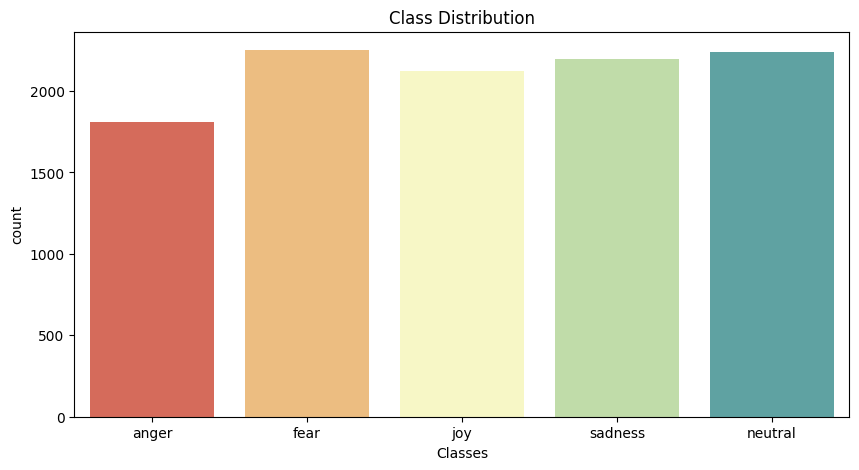

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x ='emotions', palette='Spectral')
plt.xlabel('Classes')
plt.title('Class Distribution');

In [9]:
from nltk.corpus import stopwords
import string
from nltk import word_tokenize
from nltk.stem import PorterStemmer
import re
import nltk

In [10]:
nltk.download('stopwords')
porter = PorterStemmer()
stop_words= stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
def cleaning (text):
    # this code will remove the punctuation from the text
    text= ''.join([word.lower() for word in text if word not in string.punctuation])
    # this code will remove URL from the text
    text = re.sub(r'http\S+', '', text)

    # tokenization with nltk
    text = word_tokenize(text)

    # stemming with nltk and removing stop words
    text = [porter.stem(word) for word in text if word not in stop_words]
    return text

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['tweet']], df['emotions'], test_size=0.2)

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vect = TfidfVectorizer(analyzer=cleaning)
tfidf_vect_fit = tfidf_vect.fit(X_train['tweet'])

tfidf_train = tfidf_vect_fit.transform(X_train['tweet'])
tfidf_test = tfidf_vect_fit.transform(X_test['tweet'])


In [18]:
X_tfidf_df = pd.DataFrame(tfidf_train.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_test = pd.DataFrame(tfidf_test.toarray())
X_tfidf_test.columns = tfidf_vect.get_feature_names()
X_tfidf_df

AttributeError: ignored